In [3]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy
import pygame
from pygame.locals import *
from sys import exit
import random
import pygame.surfarray as surfarray

pygame.init()

screen = pygame.display.set_mode((640,480),0,32)

#Creating 2 bars, a ball and background.
back = pygame.Surface((640,480))
background = back.convert()
background.fill((0,0,0))
bar = pygame.Surface((10,50))
bar1 = bar.convert()
bar1.fill((255,255,255))
bar2 = bar.convert()
bar2.fill((255,255,255))
circ_sur = pygame.Surface((15,15))
circ = pygame.draw.circle(circ_sur,(255,255,255),(int(15/2),int(15/2)),int(15/2))
circle = circ_sur.convert()
circle.set_colorkey((0,0,0))



# some definitions
bar1_x, bar2_x = 10. , 620.
bar1_y, bar2_y = 215. , 215.
circle_x, circle_y = 307.5, 232.5
bar1_move, bar2_move = 0. , 0.
speed_x, speed_y, speed_circ = 250., 250., 250.
bar1_score, bar2_score = 0,0

#clock and font objects
clock = pygame.time.Clock()
font = pygame.font.SysFont("calibri",40)

done = False
while done==False:       
    for event in pygame.event.get(): # User did something
        if event.type == pygame.QUIT: # If user clicked close
            done = True # Flag that we are done so we exit this loop
        if event.type == KEYDOWN:
            if event.key == K_UP:
                bar1_move = -ai_speed
            elif event.key == K_DOWN:
                bar1_move = ai_speed
        elif event.type == KEYUP:
            if event.key == K_UP:
                bar1_move = 0.
            elif event.key == K_DOWN:
                bar1_move = 0.

    score1 = font.render(str(bar1_score), True,(255,255,255))
    score2 = font.render(str(bar2_score), True,(255,255,255))

    screen.blit(background,(0,0))
    frame = pygame.draw.rect(screen,(255,255,255),Rect((5,5),(630,470)),2)
    middle_line = pygame.draw.aaline(screen,(255,255,255),(330,5),(330,475))
    screen.blit(bar1,(bar1_x,bar1_y))
    screen.blit(bar2,(bar2_x,bar2_y))
    screen.blit(circle,(circle_x,circle_y))
    screen.blit(score1,(250.,210.))
    screen.blit(score2,(380.,210.))

    bar1_y += bar1_move

    # movement of circle
    time_passed = clock.tick(40)
    time_sec = time_passed / 1000.0

    circle_x += speed_x * time_sec
    circle_y += speed_y * time_sec
    ai_speed = speed_circ * time_sec
    

    #AI of the computer.
    if circle_x >= 305.:
        if not bar2_y == circle_y + 7.5:
            if bar2_y < circle_y + 7.5:
                bar2_y += ai_speed
            if  bar2_y > circle_y - 42.5:
                bar2_y -= ai_speed
        else:
            bar2_y == circle_y + 7.5

    if bar1_y >= 420.: bar1_y = 420.
    elif bar1_y <= 10. : bar1_y = 10.
    if bar2_y >= 420.: bar2_y = 420.
    elif bar2_y <= 10.: bar2_y = 10.
    #since i don't know anything about collision, ball hitting bars goes like this.
    if circle_x <= bar1_x + 10.:
        if circle_y >= bar1_y - 7.5 and circle_y <= bar1_y + 42.5:
            circle_x = 20.
            speed_x = -speed_x
    if circle_x >= bar2_x - 15.:
        if circle_y >= bar2_y - 7.5 and circle_y <= bar2_y + 42.5:
            circle_x = 605.
            speed_x = -speed_x
    if circle_x < 5.:
        bar2_score += 1
        circle_x, circle_y = 320., 232.5
        bar1_y,bar_2_y = 215., 215.
    elif circle_x > 620.:
        bar1_score += 1
        circle_x, circle_y = 307.5, 232.5
        bar1_y, bar2_y = 215., 215.
    if circle_y <= 10.:
        speed_y = -speed_y
        circle_y = 10.
    elif circle_y >= 457.5:
        speed_y = -speed_y
        circle_y = 457.5

    pygame.display.update()

pygame.quit()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [1]:
import pygame
from pygame.locals import *

score = 0
screen_width=400.
screen_height=300.

pygame.init()

bar_width, bar_height = screen_width / 32., screen_height / 6.
bar_dist_from_edge = screen_width / 64.
circle_diameter = screen_height / 16.
circle_radius = circle_diameter / 2.
bar_1_start_x = bar_dist_from_edge
bar_start_y = (screen_height - bar_height) / 2.
bar_max_y = screen_height - bar_height - bar_dist_from_edge
circle_start_x, circle_start_y = (screen_width - circle_diameter), (screen_width - circle_diameter) / 2.

screen = pygame.display.set_mode((int(screen_width), int(screen_height)), 0, 32)

# Creating 2 bars, a ball and background.
back = pygame.Surface((int(screen_width), int(screen_height)))
background = back.convert()
background.fill((0, 0, 128))
bar = pygame.Surface((int(bar_width), int(bar_height)))
bar1 = bar.convert()
bar1.fill((255, 100, 255))
circle_surface = pygame.Surface((int(circle_diameter), int(circle_diameter)))
pygame.draw.circle(circle_surface, (255, 255, 255), (int(circle_radius), int(circle_radius)), int(circle_radius))
circle = circle_surface.convert()
circle.set_colorkey((255, 153, 153))
circle.fill((255,155,0))

# some definitions
bar1_x = bar_1_start_x
bar1_y = bar_start_y
circle_x, circle_y = circle_start_x, circle_start_y
bar1_move, bar2_move = 0., 0.
speed_x, speed_y, speed_bar = -screen_width / 1.28, screen_height / 1.92, screen_height * 1.2

clock = pygame.time.Clock()

while True:
    event = pygame.event.poll()
    if event.type == pygame.QUIT:  # If user clicked close
        break
    if event.type == KEYDOWN:
        if event.key == K_UP:
            bar1_move = -ai_speed
        elif event.key == K_DOWN:
            bar1_move = ai_speed
    elif event.type == KEYUP:
        if event.key == K_UP:
            bar1_move = 0.
        elif event.key == K_DOWN:
            bar1_move = 0.

    screen.blit(background, (0, 0))
    screen.blit(bar1, (bar1_x, bar1_y))
    screen.blit(circle, (circle_x, circle_y))

    bar1_y += bar1_move

    # movement of circle
    time_passed = clock.tick(60)
    time_sec = time_passed / 1000.0

    circle_x += speed_x * time_sec
    circle_y += speed_y * time_sec
    ai_speed = speed_bar * time_sec

    if bar1_y >= bar_max_y:
        bar1_y = bar_max_y
    elif bar1_y <= bar_dist_from_edge:
        bar1_y = bar_dist_from_edge

    if circle_x < bar_dist_from_edge + bar_width:
        if circle_y >= bar1_y - circle_radius and circle_y <= bar1_y + bar_height + circle_radius:
            circle_x = bar_dist_from_edge + bar_width
            speed_x = -speed_x
    if circle_x < -circle_radius:
        score -= 1
        circle_x, circle_y = circle_start_x, circle_start_y
        bar1_y, bar_2_y = bar_start_y, bar_start_y
    elif circle_x > screen_width - circle_diameter:
        score += 1
        speed_x = -speed_x
    if circle_y <= bar_dist_from_edge:
        speed_y = -speed_y
        circle_y = bar_dist_from_edge
    elif circle_y >= screen_height - circle_diameter - circle_radius:
        speed_y = -speed_y
        circle_y = screen_height - circle_diameter - circle_radius

    pygame.display.update()

pygame.quit()
#색 바꾸고 , 공 모양바꿈

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [10]:
import PIL.Image as pilimg

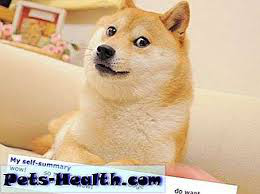

In [11]:
a=pilimg.open('./download.jpg')
a